In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/text_prep.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# column 목록 가져와보기
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# map을 이용해 컬럼 목록을 대문자로
data.columns.map(str.upper)

Index(['PASSENGERID', 'SURVIVED', 'PCLASS', 'NAME', 'SEX', 'AGE', 'SIBSP',
       'PARCH', 'TICKET', 'FARE', 'CABIN', 'EMBARKED'],
      dtype='object')

In [5]:
# DataFrame의 columns을 일괄적으로 대문자 처리
# data.columns = data.columns.map(str.upper)
data.rename(columns=str.upper)

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### `map()`, `apply()`

- DaraFrame, Series Data type에 대해서 함수 적용 (동일 작업반복)
    
    - 각 column
    
    - 각 row

#### 남자:0, 여자:1 값을 가지는 `sex_num` column추가

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data['sex_num'] = -1

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,-1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,-1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,-1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,-1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,-1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,-1


<br>

1. mapping {'male':0, ...}

2. 함수 선언 후 row별 value에 따라 return 0 or 1

In [8]:
sex_map = {'male':0, 'female':1}

data['sex_num'] = data['Sex'].map(sex_map)

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [9]:
data['sex_num'] = -1

def change_str_to_num(value):
    if value == 'male': return 0
    if value == 'female': return 1
    
# Python first class object: function pointer > map(func) 실행 시: func 실행 된 값을 mapping
data['sex_num'] =  data['Sex'].map(change_str_to_num)

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


#### 이름 길이 값을 저장하는 `name_length` column 추가

In [10]:
data['name_length'] = data['Name'].map(len)

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_num,name_length
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,44
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,21
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,28
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,40
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,21


In [11]:
# 성별이 영향을 줬는지 여부 확인
# 상관계수 구하면 column간 관계 유추 가능
data[['Survived', 'sex_num']].corr()

,Survived,sex_num
Survived,1.000000,0.543351
sex_num,0.543351,1.000000


\> positive value: 한 data가 증가하면 다른 data도 증가하는 경향이 있다.

In [12]:
# 이름 길이가 `Survived`에 영향을 줬는지 확인

data[['Survived', 'name_length']].corr()

,Survived,name_length
Survived,1.00000,0.33235
name_length,0.33235,1.00000


\> 한 쪽이 증가할 때 다른 쪽도 증가하긴 하나 거의 무관함

<br>

### `fare` data를 소수점 첫 번째 자리에서 반올림한 실수형으로 표기 후 <br>  새로운 column `fare_ceil`로 추가

- Python method: `round()`

- numpy method: `np.ceil()`

In [13]:
data['fare_ceil'] = data['Fare'].round(0)

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_num,name_length,fare_ceil
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,23,7.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,51,71.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,22,8.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,44,53.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,24,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,21,13.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,28,30.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,40,23.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,21,30.0


In [14]:
# 요금과 'Survived'간의 상관관계 도출

data[['fare_ceil', 'Survived']].corr()

,fare_ceil,Survived
fare_ceil,1.000000,0.257088
Survived,0.257088,1.000000


\> 양의 값이긴 하나 거의 의미 없음

<br>

- `np.ceil()`: 소수점 첫 자리에 있는 모든 값에 대해서 올림을 적용

- 특정 값보다 큰 정수 중 최소 값으로 적용

In [15]:
data['Fare'].map(np.ceil)

0       8.0
1      72.0
2       8.0
3      54.0
4       9.0
       ... 
886    13.0
887    30.0
888    24.0
889    30.0
890     8.0
Name: Fare, Length: 891, dtype: float64

<br>

- 나이가 `Survived`에 영향을 미쳤는지 조사 후 결과 도출

In [16]:
data[['Age', 'Survived']].corr()

,Age,Survived
Age,1.000000,-0.077221
Survived,-0.077221,1.000000


<br>

- 0세 ~ 40세 조건 색인, 20세 ~ 최대 조건 색인 후 재분석

In [17]:
data[data['Age'] <= 40][['Age', 'Survived']].corr()

,Age,Survived
Age,1.000000,-0.074807
Survived,-0.074807,1.000000


In [18]:
data[data['Age'] >= 20][['Age', 'Survived']].corr()

,Age,Survived
Age,1.00000,0.00766
Survived,0.00766,1.00000


\> 상관관계 없음

In [37]:
# 시각화 library
import matplotlib.pyplot as plt

<br>

### < 데이터셋 개요>

- Survived: 생존 여부
    - 0 = No
    - 1 = Yes

- pclass: 티켓 등급
    - 1 = 1st
    - 2 = 2nd
    - 3 = 3rd

- Sex: 성별

- Age: 나이

- Sibsp: 함께 탑승한 형제자매, 배우자의 수

- Parch: 함께 탑승한 부모, 자식의 수

- Ticket: 티켓 번호

- Name : 이름, 사회적등급

- Fare: 운임

- Cabin: 객실 번호

- Embarked: 탑승 항구
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton

<br>

### Data Loading

In [20]:
data = pd.read_csv('data/train.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<br>

- columns name을 소문자로

In [22]:
data.columns = data.columns.map(str.lower)

data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
# df.rename() 활용
data.rename(columns=str.lower)

# df.columns.str.lower() 활용
data.columns = data.columns.str.lower()

<br>

### 결측치 확인

- column별 개수

- Data set의 크기가 작은 경우: 결측치가 있는 record 삭제 X > 값 대체로 pre-processing

In [25]:
data.shape

(891, 12)

In [27]:
# df.isnull(): 값이 있으면 False, 없으면 True로 이루어진 DataFrame 반환
# in Python, True == 1, Fasle == 0
# df.isnull().sum() = 결측치 개수
data.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [30]:
# 전체 데이터 대비 결측치의 비중
# 결측치 / 891(= record 개수) * 100 = 비율(%)

data.isnull().sum() / len(data.index) * 100

passengerid     0.000000
survived        0.000000
pclass          0.000000
name            0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
ticket          0.000000
fare            0.000000
cabin          77.104377
embarked        0.224467
dtype: float64

<br>

- 불필요한 column 제거: `ticket`

In [33]:
data = data.drop('ticket', axis=1)

data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


In [34]:
# 누락 확인

'ticket' in data.columns

False

In [39]:
# ticket column을 누락시킨 csv file output

data.to_csv('data/ticket_deleted_titanic.csv')

<br>

- 단, 그냥 `df.to_csv()` 실행 시 자동으로 row name을 삽입   
추후 import할 때 `Unnamed :0` column 생성   
    \> 이를 방지하기 위해 `index=False` optional parameter 지정


<br>

### Cabin 데이터를 활용하여 유도변수 생성
- 개별 객실 번호는 의미가 없음(123, 456 ...)
- cabin 데이터의 첫 글자가 deck(구역)을 의미
- 유도변수 : deck컬럼 추가
- deck 컬럼에 추가될 자료 : A, B, C, D, E, F, G, T, unknown
- cabin 컬럼의 각 값에 적용할 처리
    - 1)
        - 값의 첫 번째 문자가 deck list에 있으면 해당 deck을 반환
        - 없으면(NaN) deck list의 unknown 반환
    - 2)
        - 첫 번째 문자 반환
        - 없으면 다른 것 반환
- NaN 처리
 1. type = float
 2. 다른 값으로 대체해서 처리
 3. str으로 변경

In [40]:
deck_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'unknown']
sample = ['C123', np.nan, 'D201', np.nan, 'F999']
# result = ['C', 'unknown', 'D', 'unknown', 'F']

<br>

- 함수 정의 후 `apply()` or `map()`을 통해 유도변수로 교체

In [49]:
def cabin_to_deck(cabin):
    if type(cabin) == type(np.nan):
        return deck_list[-1]
    
    if cabin[0] in deck_list:
        return cabin[0]
    else: return None

data['deck'] = data['cabin'].map(cabin_to_deck)

data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,unknown
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S,unknown
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,C


<br>

### Name 데이터를 활용하여 유도변수 생성
- 개별 이름은 모델 예측에 유의미한 변수가 아니다.
- 대표 특성을 찾을 수 있는 범주 데이터를 추출할 수 있다.
- Mr, Ms, Miss, Master ...
- 추출 하여 title 컬럼으로 추가
- 첫번째 방법. split() 두번 사용하여 처리
- 두번째 방법. 정규식을 사용하여 처리
    - ver1
        - 정규식 패턴 생성에 사용할 문자열 : Sir, Mr, Don, Major, Capt, Jonkheer, Rev, Col, Dr, Mrs, Countess, Dona, Mme, Ms, Miss, Mlle, Master
        - 정규식 사용 순서 : 원본 문자열에서 split 결과의 1번 인덱스 값
    - ver2
        - 정규식 패턴 : [a-zA-Z]+\.

<br>

- 첫 번째 방법: `str.split()` 두 번 사용하여 처리

In [56]:
def name_split(name) -> str:
    return name.split(',')[1].split('.')[0]

data['splited_name'] = data['name'].map(name_split)

data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked,deck,splited_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,unknown,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,unknown,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,unknown,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,unknown,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,B,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S,unknown,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,C,Mr


In [57]:
data['splited_name'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

<br>

- 정규표현식: regular expression

- library `re` import

In [58]:
import re

In [69]:
# 정규표현식은 re.compile('내부 패턴', re.I)를 이용하면 해당 단어만 뽑아줍니다.
# 이를 위해서 반드시 먼저 import re 가 실행되어 있어야 합니다.
# 단어 리스트를 가지고 정규식 패턴 적용
def get_title(name):
    # 둘 이상의 단어를 타겟으로 잡을때는 |(쉬프트 + 역슬래시)를 사용합니다.
    pattern = re.compile('Sir|Mrs|Don|Major|Capt|Jonkheer|Rev|Col|Dr|Mr|Countess|Dona|Mme|Ms|Miss|Mlle|Master',
                         re.I)
    # 정규식변수.search(타겟) => 타겟에서 패턴에 해당하는 자료가 있는지 조사
    result = pattern.search(name)
    # print(result)
    if result:
        return result.group().lower()
    else:
        str(np.nan)

In [65]:
get_title("sjgloamisIrklrgma")

<re.Match object; span=(8, 11), match='sIr'>


'sir'

In [66]:
get_title("Captain America")

<re.Match object; span=(0, 4), match='Capt'>


'capt'

In [78]:
data['title'] = data['name'].apply(get_title)

data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked,deck,splited_name,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,unknown,Mr,mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,C,Mrs,mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,unknown,Miss,miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,C,Mrs,mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,unknown,Mr,mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,unknown,Rev,rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,B,Miss,miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S,unknown,Miss,miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,C,Mr,mr


In [72]:
# re를 사용하지 않는 경우는 팬더스에서 .str.extract('패턴')를 사용한다.
data['name'].str.extract('([a-zA-Z]+)\.', expand=False)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: name, Length: 891, dtype: object

In [73]:
data['title'].value_counts()

mr          493
miss        177
mrs         123
master       39
dr           16
col          12
ms            8
rev           6
don           4
mme           4
sir           2
major         2
mlle          2
capt          1
countess      1
jonkheer      1
Name: title, dtype: int64

<br>

### 범주 재설정
    capt - Officer
    col - Officer
    major - Officer
    dr - Officer
    jonkheer - Royalty
    rev - Officer
    countess - Royalty
    dona - Royalty
    lady - Royalty
    don - Royalty
    sir - Officer
    mr - Mr


In [74]:
title_map = {
    "capt":"Officer",
    "col":"Officer",
    "major":"Officer",
    "dr":"Officer",
    "jonkheer":"Royalty",
    "rev":"Officer",
    "countess":"Royalty",
    "dona":"Royalty",
    "lady":"Royalty",
    "don":"Royalty",
    'sir' : 'Officer',
    "mr":"Mr",
    "mme":"Mrs",
    "ms":"Mrs",
    "mrs":"Mrs",
    "miss":"Miss",
    "mlle":"Miss",
    "master":"Master",
    "nan":"Mr"
}

In [81]:
data['title'] = data['title'].map(title_map)

data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked,deck,splited_name,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,unknown,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,C,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,unknown,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,C,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,unknown,Mr,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,unknown,Rev,Officer
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,B,Miss,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S,unknown,Miss,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,C,Mr,Mr


<br>

### 결측치 처리 - Age
- 미성년(Master, Miss)
- title 별 평균으로 age 결측치 대체
- transform
- (참고)사용자정의함수 : 매개변수 3개(타이틀별평균, 데이터, 타이틀리스트)

In [82]:
data['age'].isnull().sum()

177

<br>

- `df['col'].transform(mean)`

- `df['col'].mean()`

- `df['col'].apply(lambda x: mean(x))`

- `df['col'].apply(func)`

<br>

- `title`별 age의 평균값
- `groupby`를 사용

In [87]:
data.groupby('title')[['age']].mean()

,age
title,
Master,4.362000
Miss,21.555556
Mr,32.346457
Mrs,35.659292
Officer,37.742857
Royalty,45.666667


<br>

- `df.groupby('column')`에 붙여서 사용하는 `.transform('func')`   
  \> `column`의 각 `values`별 data를 집계함수`'func'`적용한 값으로 반환

In [96]:
data.groupby('title')['age'].transform('mean')

0      32.346457
1      35.659292
2      21.555556
3      35.659292
4      32.346457
         ...    
886    37.742857
887    21.555556
888    21.555556
889    32.346457
890    32.346457
Name: age, Length: 891, dtype: float64

In [99]:
data['age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    21.555556
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

<br>

- 원래 'age'에 있던 결측치 대신 `fillna`

In [100]:
data['age'].fillna(data.groupby('title')['age'].transform('mean'), inplace=True)

data['age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    21.555556
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [101]:
data['age'].isnull().sum()

0

<br>

### Age 데이터를 범주형 데이터로 변경
- 나이 숫자값 자체로는 의미가 적다.
- 연령대로 구분하는 것이 더 의미가 있는 구분값
- 구간
    -  ~ 20
    - 20 ~ 40
    - 40 ~ 60
    - 60 ~
- 개수 : 4개
    - `pd.cut`
    - `np.digitize`

In [103]:
# 사용자 정의 함수

def age_class(age):
    if age < 20: return 'under20'
    if age < 40: return '20-40'
    if age < 60: return '40-60'
    else: return 'over60'

In [114]:
data['age_class'] = data['age'].map(age_class)

data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked,deck,splited_name,title,age_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,NaN,S,unknown,Mr,Mr,20-40
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C85,C,C,Mrs,Mrs,20-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,NaN,S,unknown,Miss,Miss,20-40
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,C123,S,C,Mrs,Mrs,20-40
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,NaN,S,unknown,Mr,Mr,20-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,NaN,S,unknown,Rev,Officer,20-40
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,B42,S,B,Miss,Miss,under20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.555556,1,2,23.4500,NaN,S,unknown,Miss,Miss,20-40
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C148,C,C,Mr,Mr,20-40


In [115]:
# 연령대별 데이터 개수 확인
data['age_class'].value_counts()

20-40      560
under20    168
40-60      137
over60      26
Name: age_class, dtype: int64

In [118]:
# 연령대별 생존/사망자별 인원수
data.groupby('survived').age_class.value_counts()

survived  age_class
0         20-40        360
          under20       87
          40-60         83
          over60        19
1         20-40        200
          under20       81
          40-60         54
          over60         7
Name: age_class, dtype: int64

In [121]:
data.groupby(['age_class', 'survived'])[['survived']].count()

survived
age_class survived          
20-40     0              360
          1              200
40-60     0               83
          1               54
over60    0               19
          1                7
under20   0               87
          1               81

In [124]:
age_classed_data = data.groupby(['age_class', 'survived', 'sex'])[['survived']].count()

age_classed_data

survived
age_class survived sex             
20-40     0        female        47
                   male         313
          1        female       138
                   male          62
40-60     0        female        12
                   male          71
          1        female        38
                   male          16
over60    0        male          19
          1        female         4
                   male           3
under20   0        female        22
                   male          65
          1        female        53
                   male          28

<br>

- `barplot`그리기, `stacked`형태로 그리기

- `DataFrame`에 바로 `plot()`, `hist()`등을 사용

<AxesSubplot:xlabel='survived,sex'>

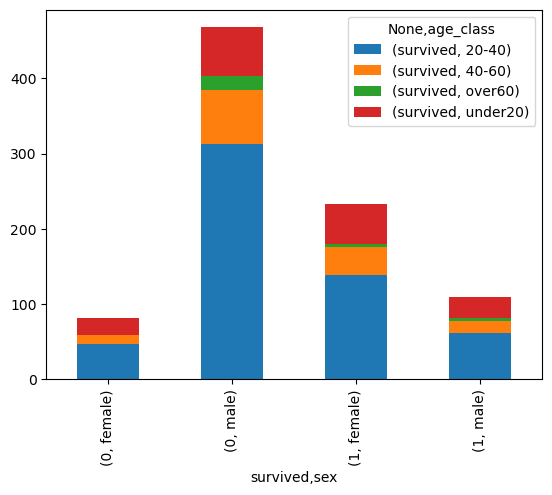

In [127]:
# 'survived' -> row, 'age_class' -> column by `unstack()`

age_classed_data.unstack(0).plot(kind='bar', stacked=True)

<br>

### 각 성별 생존자, 탑승표 등급별 생존자 분석

- 탑승표 등급별 생존/사망자 시각화 by `groupby()`

1. 생존자와 사망자를 탑승표로 분류 후 가공

2. 차트화

    - x축: 생존여부 `survived`
        
    - y축: 탑승표 종류 `pclass`

In [134]:
pclass_survived = data.groupby(['pclass', 'survived'])[['survived']].count()

pclass_survived

survived
pclass survived          
1      0               80
       1              136
2      0               97
       1               87
3      0              372
       1              119

In [135]:
pclass_survived.unstack(0)

survived         
pclass          1   2    3
survived                  
0              80  97  372
1             136  87  119

<AxesSubplot:xlabel='survived'>

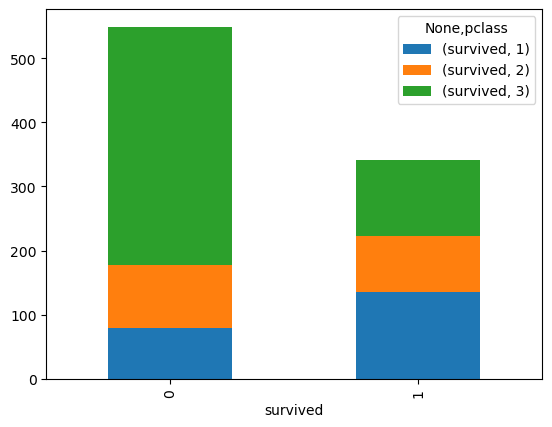

In [136]:
pclass_survived.unstack(0).plot(kind='bar', stacked=True)